# 1. Data Preprocessing Module
This includes loading the dataset, handling missing values, encoding categorical variables, scaling, and preparing the data for model training.

Steps:
1. Function to load .arff file
2. Load data
3. Define the column names
4. Handle missing values if any
5. Encode categorical variables
6. Scaling numeric features
7. Data inspection

In [2]:

from scipy.io import arff
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler



In [3]:
def load_data(file_path):
    data, meta = arff.loadarff(file_path)
    df = pd.DataFrame(data)  # Convert to DataFrame
    return df


In [4]:
file_path = "E:\\Projects\\heart\\phpgNaXZe.arff"
data = load_data(file_path)

In [5]:
column = ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'type', 'obesity', 'alcohol', 'age', 'chd']
data.columns = column

In [6]:
data

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,160.0,12.00,5.73,23.11,b'1',49.0,25.30,97.20,52.0,b'2'
1,144.0,0.01,4.41,28.61,b'2',55.0,28.87,2.06,63.0,b'2'
2,118.0,0.08,3.48,32.28,b'1',52.0,29.14,3.81,46.0,b'1'
3,170.0,7.50,6.41,38.03,b'1',51.0,31.99,24.26,58.0,b'2'
4,134.0,13.60,3.50,27.78,b'1',60.0,25.99,57.34,49.0,b'2'
...,...,...,...,...,...,...,...,...,...,...
457,214.0,0.40,5.98,31.72,b'2',64.0,28.45,0.00,58.0,b'1'
458,182.0,4.20,4.41,32.10,b'2',52.0,28.61,18.72,52.0,b'2'
459,108.0,3.00,1.59,15.23,b'2',40.0,20.09,26.64,55.0,b'1'
460,118.0,5.40,11.61,30.79,b'2',64.0,27.35,23.97,40.0,b'1'


In [7]:
data.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
type         0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [8]:
encoder = LabelEncoder()
data['famhist'] = encoder.fit_transform(data['famhist'])
data['chd'] = encoder.fit_transform(data['chd'])

In [9]:
scaler = MinMaxScaler(feature_range=(0, 100))
numeric_cols = ['sbp', 'tobacco', 'ldl', 'adiposity', 'obesity', 'alcohol', 'age']
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [10]:
print(data.describe())

              sbp     tobacco         ldl   adiposity     famhist        type  \
count  462.000000  462.000000  462.000000  462.000000  462.000000  462.000000   
mean    31.903282   11.652722   26.204353   52.214634    0.584416   53.103896   
std     17.518220   14.721231   14.431423   21.764192    0.493357    9.817534   
min      0.000000    0.000000    0.000000    0.000000    0.000000   13.000000   
25%     19.658120    0.168269   16.045296   36.461538    0.000000   47.000000   
50%     28.205128    6.410256   23.414634   54.195804    1.000000   53.000000   
75%     40.170940   17.628205   33.519164   68.496503    1.000000   60.000000   
max    100.000000  100.000000  100.000000  100.000000    1.000000   78.000000   

          obesity     alcohol         age         chd  
count  462.000000  462.000000  462.000000  462.000000  
mean    35.583791   11.579859   56.767382    0.346320  
std     13.217316   16.632284   29.814197    0.476313  
min      0.000000    0.000000    0.000000    0

# 2. EDA Module
Visualize relationships in the data.

Steps:
1. Set matplotlib inline for plotting
2. %matplotlib inline
3. Pairplot to visualize relationships
4. Correlation heatmap
5. Histograms and boxplots for numeric columns

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

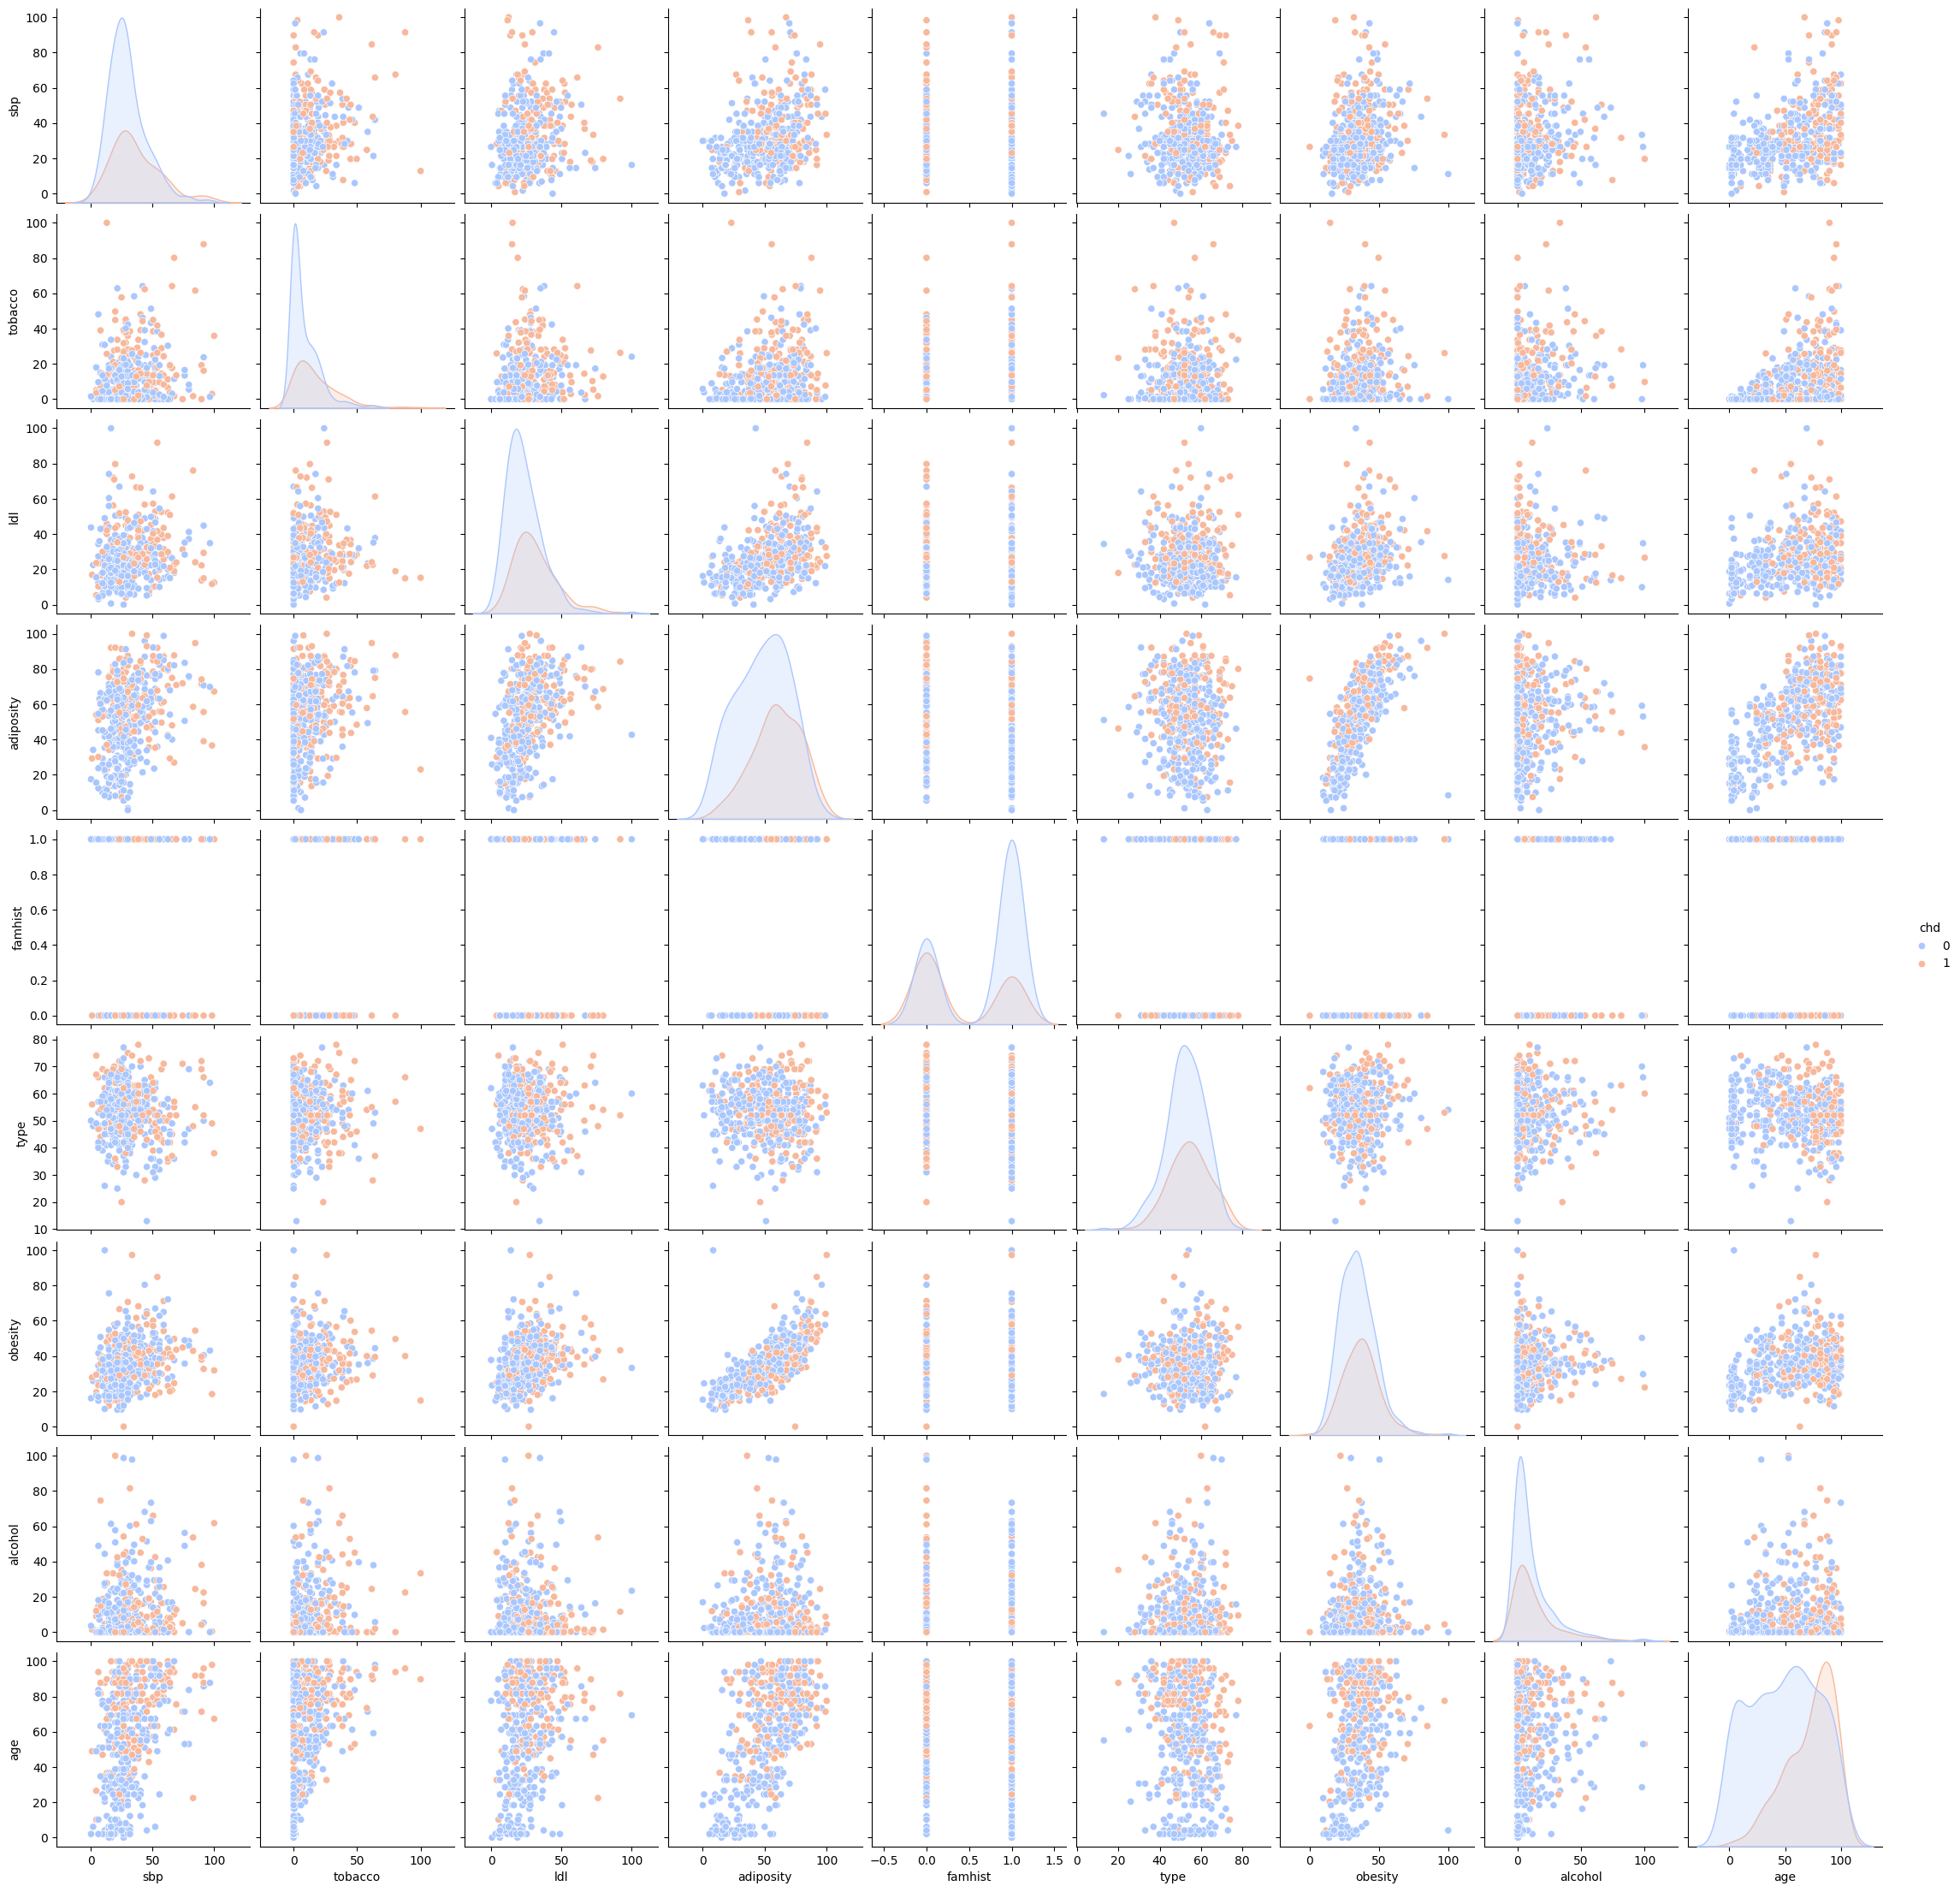

In [13]:
sns.pairplot(data, diag_kind='kde', hue='chd', palette='coolwarm')

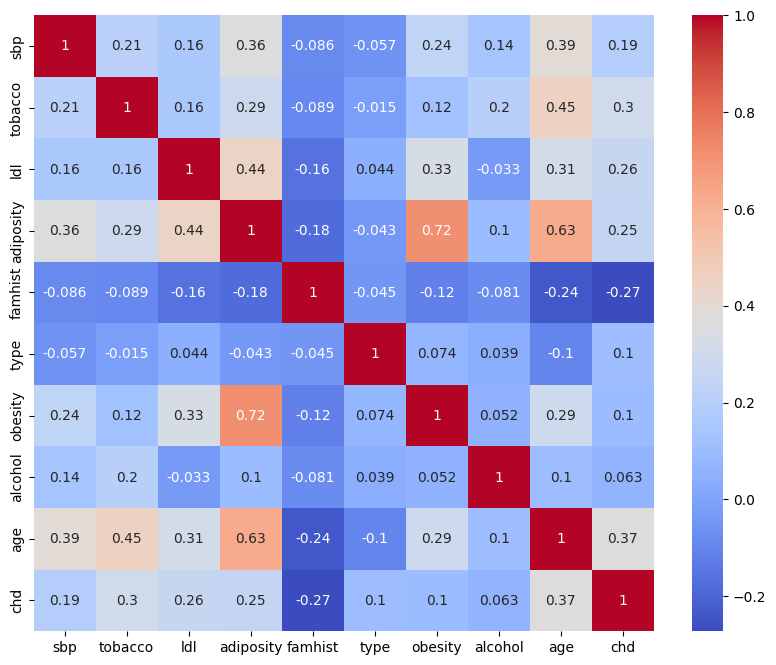

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

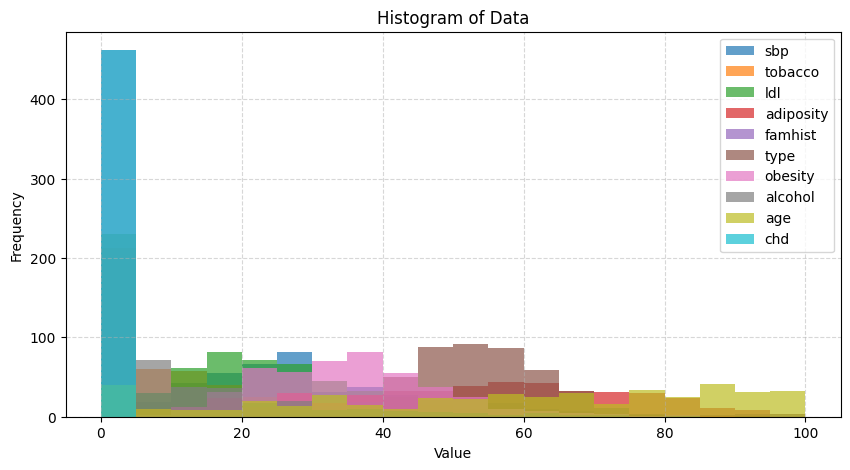

In [15]:
import matplotlib.pyplot as plt

data.plot(kind='hist', figsize=(10, 5), bins=20, alpha=0.7)
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(visible=True, linestyle='--', alpha=0.5)  # Add gridlines for clarity



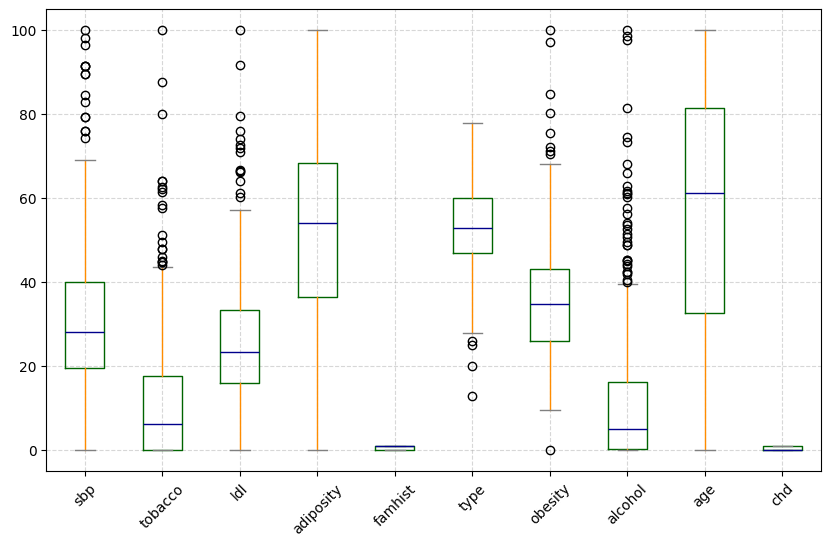

In [16]:
data.plot(kind='box', figsize=(10, 6),
          color=dict(boxes='DarkGreen', whiskers='DarkOrange',
                     medians='DarkBlue', caps='Gray'))
plt.ylim([data.min().min() - 5, data.max().max() + 5])  # Set y-limits dynamically
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(visible=True, linestyle='--', alpha=0.5)  # Add gridlines

# 3. Model Building & Training Module
Splitting data into training/testing sets, building the SVM model, and training it.

Steps:
1. Select features and target
2. Train-test split
3. SVM model with linear kernel
4. Train the model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import svm

In [18]:
features = ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'type', 'obesity', 'alcohol', 'age']
X = data[features]
y = data['chd']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [20]:
svm_clf = svm.SVC(kernel='linear', C=1)

In [21]:
svm_clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

# 4. Evaluation Module
This includes predictions, evaluation using confusion matrix, and accuracy metrics.

Steps:
1. Make predictions
2. Confusion matrix
3. Accuracy score
4. Recall and precision

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [23]:
y_pred_svm = svm_clf.predict(X_test)
y_pred_svm

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0])

In [24]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:\n", cm_svm)

Confusion Matrix:
 [[51  9]
 [15 18]]


In [25]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {svm_accuracy:.4f}")

Accuracy: 0.7419


In [26]:
recall_svm = cm_svm[0][0] / (cm_svm[0][0] + cm_svm[0][1])
precision_svm = cm_svm[0][0] / (cm_svm[0][0] + cm_svm[1][1])
print(f"Recall: {recall_svm:.4f}, Precision: {precision_svm:.4f}")

Recall: 0.8500, Precision: 0.7391
